In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
# Drop rows with missing values in 'kms_driven' and 'fuel_type'
df.dropna(subset=['kms_driven', 'fuel_type'], inplace=True)

In [6]:
# Remove 'Ask For Price' rows in 'Price' column
df = df[df['Price'] != 'Ask For Price']

In [7]:
# Clean and convert 'Price' column to numeric (remove commas)
df['Price'] = df['Price'].str.replace(',', '').astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\2492196910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(',', '').astype(int)


In [8]:
# Clean and convert 'kms_driven' column to numeric (remove 'kms' and commas)
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\3564960838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(int)


In [9]:
#Convert the 'year' column to integer
df['year'] = df['year'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\355723465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [10]:
# Create a 'car_age' feature
df['car_age'] = 2024 - df['year']

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\1569236877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = 2024 - df['year']


In [11]:
# Drop the original 'year' and 'name' columns
df.drop(['year', 'name'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\1976432385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['year', 'name'], axis=1, inplace=True)


In [12]:
# Display the cleaned data
df

,company,Price,kms_driven,fuel_type,car_age
0,Hyundai,80000,45000,Petrol,17
1,Mahindra,425000,40,Diesel,18
3,Hyundai,325000,28000,Petrol,10
4,Ford,575000,36000,Diesel,10
6,Ford,175000,41000,Diesel,12
...,...,...,...,...,...
883,Maruti,270000,50000,Petrol,13
885,Tata,110000,30000,Diesel,15
886,Toyota,300000,132000,Petrol,15
888,Tata,260000,27000,Diesel,6


In [13]:
#Label Encoding
# Label Encoding for 'company' and 'fuel_type'
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
df['company'] = le_company.fit_transform(df['company'])

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\2006739042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company'] = le_company.fit_transform(df['company'])


In [14]:
le_fuel_type = LabelEncoder()
df['fuel_type'] = le_fuel_type.fit_transform(df['fuel_type'])

C:\Users\HP\AppData\Local\Temp\ipykernel_1220\3989784996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type'] = le_fuel_type.fit_transform(df['fuel_type'])


In [15]:
# Display the first few rows after encoding
df.head()

,company,Price,kms_driven,fuel_type,car_age
0,9,80000,45000,2,17
1,13,425000,40,0,18
3,9,325000,28000,2,10
4,6,575000,36000,0,10
6,6,175000,41000,0,12


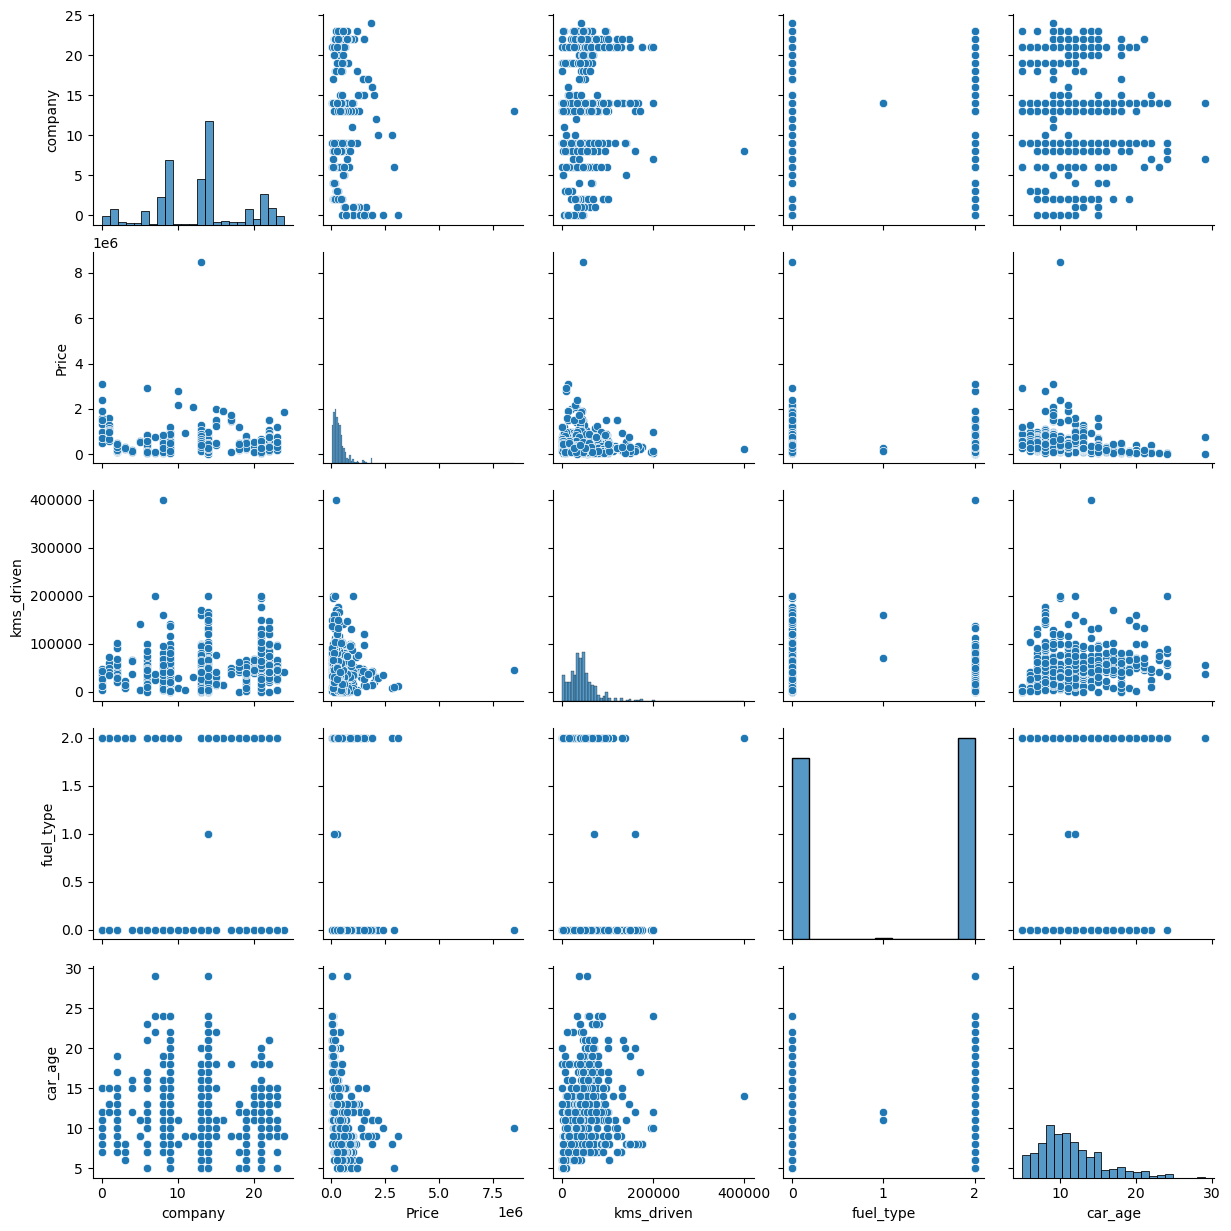

In [16]:
#Exploratory Data Analysis (EDA)
#Visualize the correlations between features:
sns.pairplot(df)
plt.show()

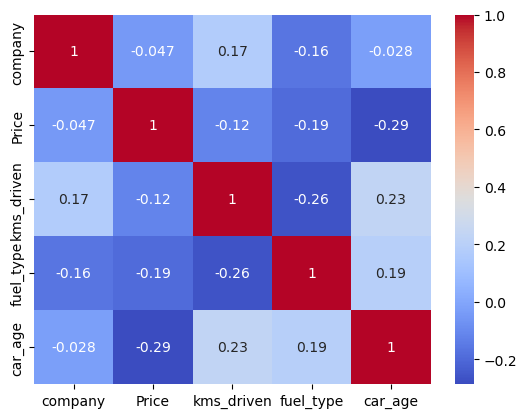

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

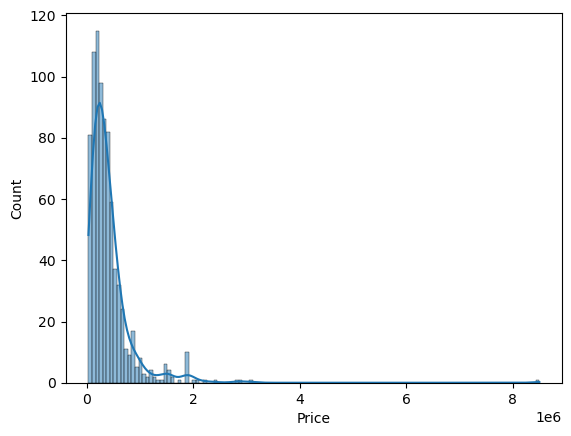

In [18]:
#Analyze the price distribution:
sns.histplot(df['Price'], kde=True)
plt.show()

In [19]:
# Data Splitting
# Split the data into training and testing sets:
from sklearn.model_selection import train_test_split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Model Building
#Train the model using Linear Regression:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
#Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 527111046439.03735
Root Mean Squared Error: 726024.1362647921
R^2 Score: 0.05736232366235172


In [ ]:
#Conclusion:

#In this project, we developed a car price predictor using a Linear Regression model. After preprocessing the data, including 
#cleaning, encoding, and feature engineering, we trained and evaluated the model. The model achieved a low R² score, indicating
#that it only explained a small portion of the variance in car prices. This suggests that the model's performance could be 
#improved.

#Future Work:

#Exploring more complex models like Random Forest or Gradient Boosting could enhance prediction accuracy.
#Further feature engineering, such as handling outliers or including additional relevant features, might improve the model's 
#performance.
#Hyperparameter tuning and cross-validation can be applied to optimize the model.